In [1]:
import decoupler as dc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [5]:
msigdb = dc.get_resource('MSigDB')
msigdb.head()

,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP


In [6]:
msigdb = msigdb[msigdb['collection']=='go_biological_process'] # filter for GO biological proccesses
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

In [7]:
msigdb.loc[:, 'geneset'] = [name.split('GOBP_')[1] for name in msigdb['geneset']] # rename

### GO of genes after linear regression

In [12]:
plt.figure(figsize=(15,15))
top_genes = pd.read_csv('/tscc/nfs/home/pjaganna1/projects/STAMP/stamp_v3_pipeline/notebooks/RPS2/annotated_gene_editsC_copy_lm_dec2023.txt', sep='\t').set_index('gene_name')
top_genes = top_genes[top_genes['sig']==True]
print(top_genes.shape[0])
top_genes['group'] = 'RPS2.vs.STAMP'

# Run ora
enr_pvals = dc.get_ora_df(
    df=top_genes,
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

enr_pvals = enr_pvals[enr_pvals['FDR p-value']<=0.05]
enr_pvals['-log10 FDR p-value'] = -np.log10(enr_pvals['FDR p-value'])
enr_pvals['Term'] = enr_pvals.apply(lambda x: ' '.join(x['Term'].split('_')).lower(), axis=1)

141


<Figure size 1500x1500 with 0 Axes>

In [13]:
enr_pvals[['Term', '-log10 FDR p-value', 'Odds ratio']].sort_values(by='-log10 FDR p-value', ascending=False).head(15)

,Term,-log10 FDR p-value,Odds ratio
1844,ribonucleoprotein complex biogenesis,8.926948,8.341452
276,chromosome organization,6.557881,6.031168
1870,rna processing,5.925881,4.675933
712,mitotic cell cycle process,5.852681,5.086755
709,mitotic cell cycle,5.737389,4.605250
42,amide metabolic process,5.701301,4.152474
561,intracellular protein transport,5.629878,4.621161
563,intracellular transport,5.587761,3.613393
1862,rna localization,5.473216,9.728403
308,cytoplasmic translation,5.455637,10.962286


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'ribonucleoprotein complex biogenesis'),
  Text(1, 0, 'chromosome organization'),
  Text(2, 0, 'rna processing'),
  Text(3, 0, 'mitotic cell cycle process'),
  Text(4, 0, 'mitotic cell cycle'),
  Text(5, 0, 'amide metabolic process'),
  Text(6, 0, 'intracellular protein transport'),
  Text(7, 0, 'intracellular transport'),
  Text(8, 0, 'rna localization'),
  Text(9, 0, 'cytoplasmic translation'),
  Text(10, 0, 'establishment of rna localization'),
  Text(11, 0, 'mitotic dna replication'),
  Text(12, 0, 'cell cycle'),
  Text(13, 0, 'protein containing complex organization'),
  Text(14, 0, 'mrna processing')])

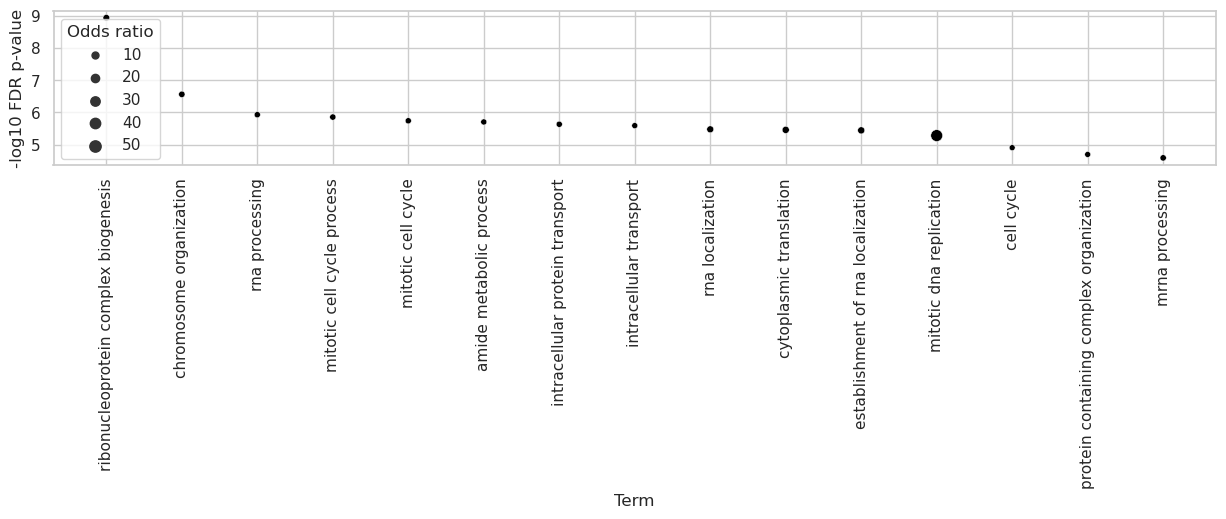

In [14]:
sns.set(rc={'figure.figsize':(15,2)})
sns.set_style('whitegrid')
sns.scatterplot(data=enr_pvals[['Term', '-log10 FDR p-value', 'Odds ratio']].sort_values(by='-log10 FDR p-value', ascending=False).head(15), x='Term', y='-log10 FDR p-value', size='Odds ratio', color='black')
plt.xticks(rotation=90)

### GO of genes after ranking by RPS2 mean

In [15]:
plt.figure(figsize=(15,15))

ranked_genes = pd.read_csv('/tscc/nfs/home/pjaganna1/projects/STAMP/stamp_v3_pipeline/notebooks/RPS2/annotated_gene_editsC_copy_lm_dec2023.txt', sep='\t').set_index('gene_name').sort_values(by='RPS2_mean', ascending=False).head(150)
ranked_genes['group'] = 'RPS2.vs.STAMP'

# Run ora
enr_pvals = dc.get_ora_df(
    df=ranked_genes,
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

enr_pvals = enr_pvals[enr_pvals['FDR p-value']<=0.05]
enr_pvals['-log10 FDR p-value'] = -np.log10(enr_pvals['FDR p-value'])
enr_pvals['Term'] = enr_pvals.apply(lambda x: ' '.join(x['Term'].split('_')).lower(), axis=1)

<Figure size 1500x1500 with 0 Axes>

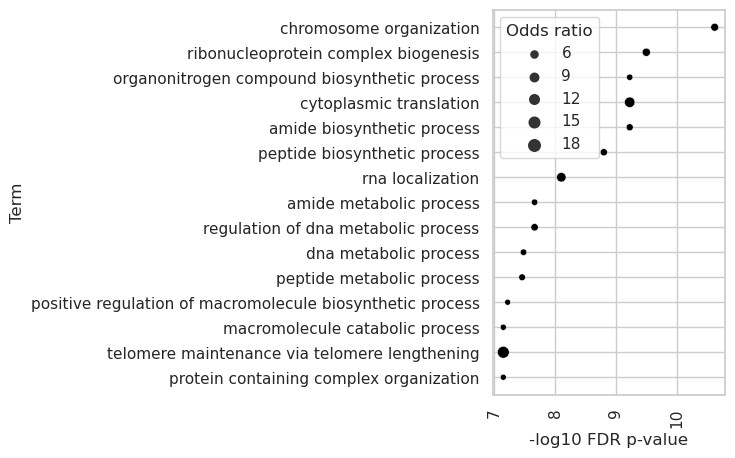

In [20]:
sns.set(rc={'figure.figsize':(3,5)})
sns.set_style('whitegrid')
sns.scatterplot(data=enr_pvals[['Term', '-log10 FDR p-value', 'Odds ratio']].sort_values(by='-log10 FDR p-value', ascending=False).head(15), y='Term', x='-log10 FDR p-value', size='Odds ratio', color='black')
plt.xticks(rotation=90)
plt.show()